In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import scipy

In [35]:
import torch
import torchvision
import torch.nn as nn
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.datasets as dsets 
from torch.autograd import Variable

In [36]:
from torch.utils.tensorboard import SummaryWriter
import datetime,os
import time

import seaborn as sns
sns.set_style('darkgrid')

In [37]:
inputSize = 784
numClasses = 10
numEpochs = 10
learningRate = 0.001
hiddenSize = 500

In [38]:
batchSize = 100

trainDataset = dsets.MNIST(root = "C:\\Users\\Bruger\\Downloads\\",
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

testDataset = dsets.MNIST(root = "C:\\Users\\Bruger\\Downloads\\",
                           train=True,
                           transform=transforms.ToTensor())

trainLoader = torch.utils.data.DataLoader(dataset = trainDataset,
                                        batch_size = batchSize,
                                        shuffle = True)

testLoader = torch.utils.data.DataLoader(dataset = testDataset,
                                        batch_size = batchSize,
                                        shuffle = False)

In [39]:
dataIter = iter(trainLoader)
trainX, trainY = next(dataIter)

In [40]:
trainX.shape

torch.Size([100, 1, 28, 28])

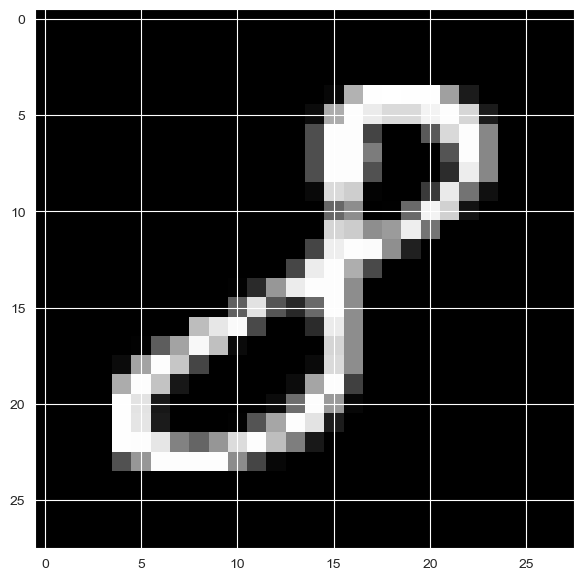

In [41]:
plt.figure(figsize = (14, 7))
plt.imshow(trainX[1, 0], cmap = 'gray')
plt.show()

In [42]:
class ThreeLayerClassification(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ThreeLayerClassification, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, hidden_size) 
        self.layer3 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)  
        out = self.relu(out)    
        out = self.layer3(out)
        out = self.softmax(out)
        return out
    
model = ThreeLayerClassification(inputSize, hiddenSize, numClasses)

In [43]:
trainX.view(-1, 28*28).shape

torch.Size([100, 784])

In [44]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learningRate)
losses = []
model.train()

ThreeLayerClassification(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=500, out_features=500, bias=True)
  (layer3): Linear(in_features=500, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

Epoch: [1/10], Loss: 2.2714
Epoch: [2/10], Loss: 2.2327
Epoch: [3/10], Loss: 2.1814
Epoch: [4/10], Loss: 2.1484
Epoch: [5/10], Loss: 2.0282
Epoch: [6/10], Loss: 1.9285
Epoch: [7/10], Loss: 1.7234
Epoch: [8/10], Loss: 1.5833
Epoch: [9/10], Loss: 1.3228
Epoch: [10/10], Loss: 1.1123


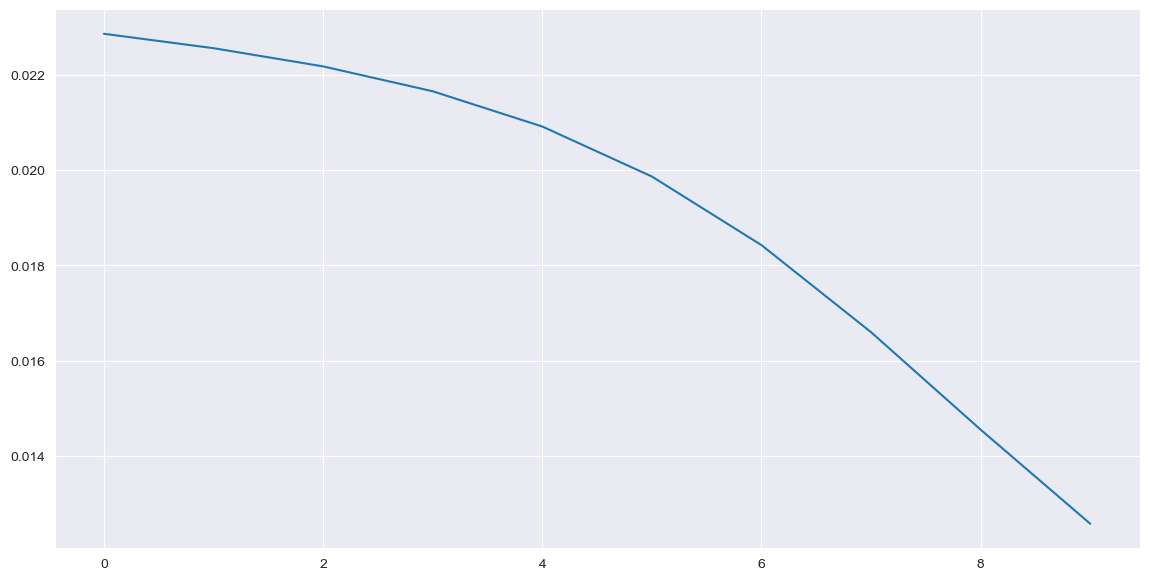

In [45]:
for epoch in range(numEpochs):
    lossTot = 0
    
    for i, (images, labels) in enumerate(trainLoader):
        images = images.view(-1, 28*28) 
        optimizer.zero_grad()
        outputs = model(images) 
        loss = criterion(outputs.log(), labels)
        loss.backward()
        
        lossTot += loss.detach().data
        
        optimizer.step()
        
    losses.append(lossTot/len(trainDataset))
    print('Epoch: [%d/%d], Loss: %.4f'
         % (epoch+1, numEpochs, loss))
plt.figure(figsize=(14,7))
plt.plot(losses)
plt.show()

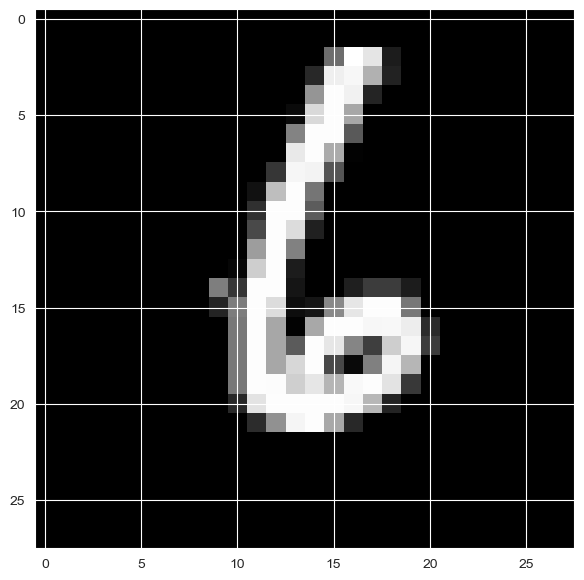

Правильна відповідь tensor(7)


In [46]:
plt.figure(figsize=(14,7))
plt.imshow(trainX[16, 0], cmap = 'gray')
plt.show()
print('Правильна відповідь', trainY[9])

In [47]:
x = model(trainX[9].view(-1, 784)).detach()
print(x.data)
print(torch.max(x.data, dim = 1))

tensor([[0.0169, 0.0017, 0.0065, 0.0126, 0.0779, 0.0282, 0.0057, 0.6403, 0.0182,
         0.1921]])
torch.return_types.max(
values=tensor([0.6403]),
indices=tensor([7]))


In [50]:
correct = 0
total = 0
total_loss = 0 

model.eval()

for images, labels in testLoader:
    images = images.view(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item() 
    
    loss = criterion(outputs, labels)  # Правильно вирівнюємо відступ для обчислення loss
    total_loss += loss.item()

accuracy = 100 * correct / total
average_loss = total_loss / len(testLoader)  # Обчислюємо середню похибку

print('Accuracy for 10000 images: %.2f %%' % accuracy)
print('Average Loss: %.4f' % average_loss)

Accuracy for 10000 images: 77.66 %
Average Loss: 2.0557


In [51]:
print(model)

ThreeLayerClassification(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=500, out_features=500, bias=True)
  (layer3): Linear(in_features=500, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


In [52]:
import torchviz

In [53]:
model.named_parameters()

<generator object Module.named_parameters at 0x000001C45FA19640>

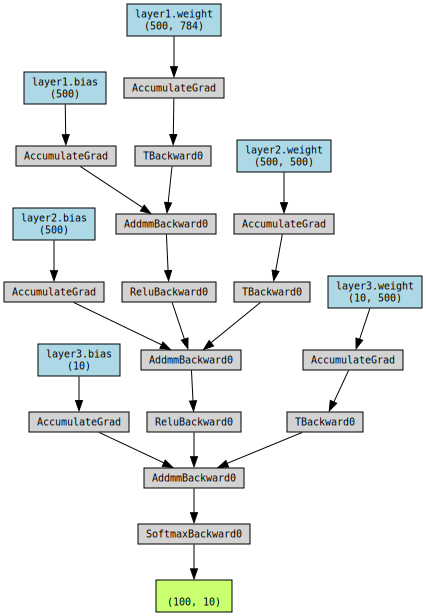

In [54]:
torchviz.make_dot(model(images), params=dict(model.named_parameters()))

In [55]:
#Mean Squared Error

In [70]:
import torch.nn.functional as F
from torch.optim import Adam

In [71]:
batchSize = 100

trainDataset = dsets.MNIST(root = "C:\\Users\\Bruger\\Downloads\\",
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

testDataset = dsets.MNIST(root = "C:\\Users\\Bruger\\Downloads\\",
                           train=True,
                           transform=transforms.ToTensor())

trainLoader = torch.utils.data.DataLoader(dataset = trainDataset,
                                        batch_size = batchSize,
                                        shuffle = True)

testLoader = torch.utils.data.DataLoader(dataset = testDataset,
                                        batch_size = batchSize,
                                        shuffle = False)

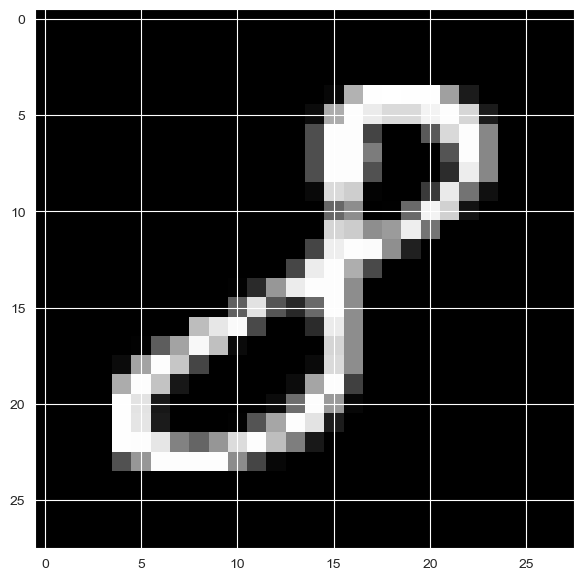

In [72]:
plt.figure(figsize = (14, 7))
plt.imshow(trainX[1, 0], cmap = 'gray')
plt.show()

In [73]:
class ThreeLayerClassification(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ThreeLayerClassification, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        out = self.relu(out)
        out = self.layer3(out)
        out = self.softmax(out)
        return out
    
model = ThreeLayerClassification(inputSize, hiddenSize, numClasses)

In [74]:
trainX.view(-1, 28*28).shape

torch.Size([100, 784])

In [75]:
criterion = nn.MSELoss() # Використовуємо MSE для обчислення похибки
optimizer = Adam(model.parameters(), lr=learningRate) #оптимізатор ADAM
losses = []
model.train()

ThreeLayerClassification(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=500, out_features=500, bias=True)
  (layer3): Linear(in_features=500, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

Epoch: [1/10], Loss: 0.0071
Epoch: [2/10], Loss: 0.0029
Epoch: [3/10], Loss: 0.0027
Epoch: [4/10], Loss: 0.0022
Epoch: [5/10], Loss: 0.0056
Epoch: [6/10], Loss: 0.0034
Epoch: [7/10], Loss: 0.0057
Epoch: [8/10], Loss: 0.0000
Epoch: [9/10], Loss: 0.0003
Epoch: [10/10], Loss: 0.0010


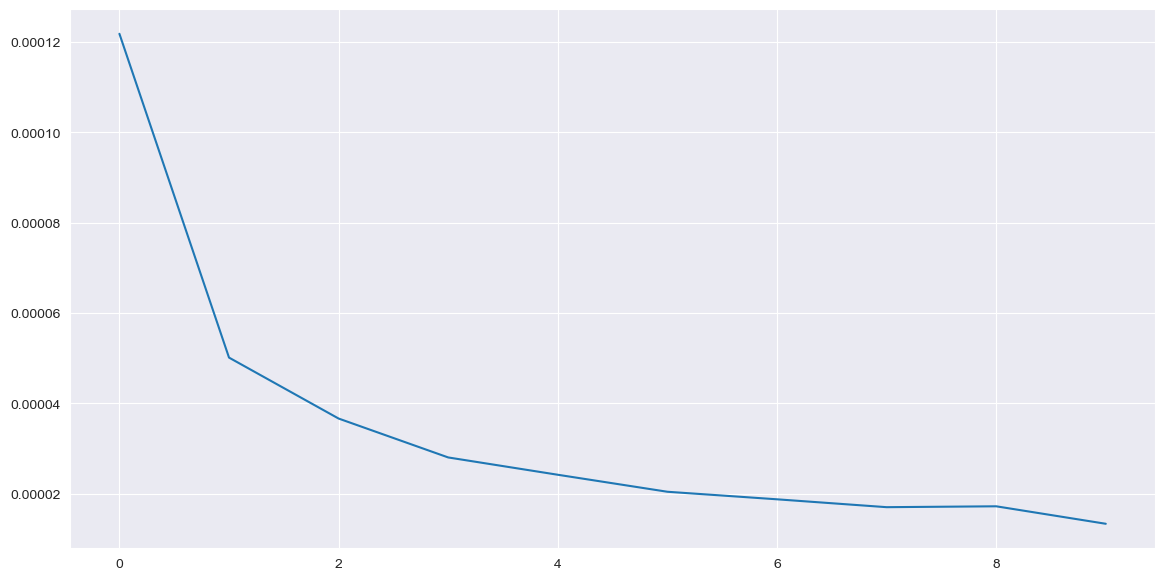

In [76]:
for epoch in range(numEpochs):
    lossTot = 0
    
    for i, (images, labels) in enumerate(trainLoader):
        images = images.view(-1, 28*28) 
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, F.one_hot(labels, numClasses).float())
        loss.backward()
        
        lossTot += loss.detach().data
        
        optimizer.step()
        
    losses.append(lossTot/len(trainDataset))
    print('Epoch: [%d/%d], Loss: %.4f'
         % (epoch+1, numEpochs, loss))
plt.figure(figsize=(14,7))
plt.plot(losses)
plt.show()

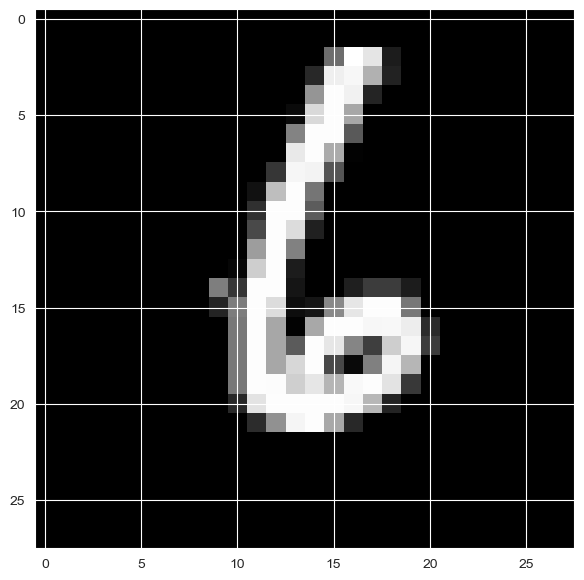

Правильна відповідь tensor(7)


In [77]:
plt.figure(figsize=(14,7))
plt.imshow(trainX[16, 0], cmap = 'gray')
plt.show()
print('Правильна відповідь', trainY[9])

In [78]:
x = model(trainX[9].view(-1, 784)).detach()
print(x.data)
print(torch.max(x.data, dim = 1))

tensor([[3.0778e-24, 1.5730e-15, 5.9790e-19, 5.4875e-13, 1.1195e-22, 2.8003e-22,
         3.0359e-30, 1.0000e+00, 2.4679e-18, 9.0511e-15]])
torch.return_types.max(
values=tensor([1.]),
indices=tensor([7]))


In [79]:
correct = 0
total = 0
total_mse = 0

model.eval()

for images, labels in testLoader:
    images = images.view(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

    target_one_hot = F.one_hot(labels, num_classes=numClasses).float()
    mse = F.mse_loss(outputs, target_one_hot)
    total_mse += mse.item()

accuracy = 100 * correct / total
average_mse = total_mse / len(testLoader)

print('Accuracy for 10000 images: %.2f %%' % accuracy)
print('Average MSE: %.4f' % average_mse)

print(model)

Accuracy for 10000 images: 99.30 %
Average MSE: 0.0012
ThreeLayerClassification(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=500, out_features=500, bias=True)
  (layer3): Linear(in_features=500, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


In [80]:
print(model)

ThreeLayerClassification(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=500, out_features=500, bias=True)
  (layer3): Linear(in_features=500, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


In [81]:
import torchviz

In [82]:
model.named_parameters()

<generator object Module.named_parameters at 0x000001C461A50640>

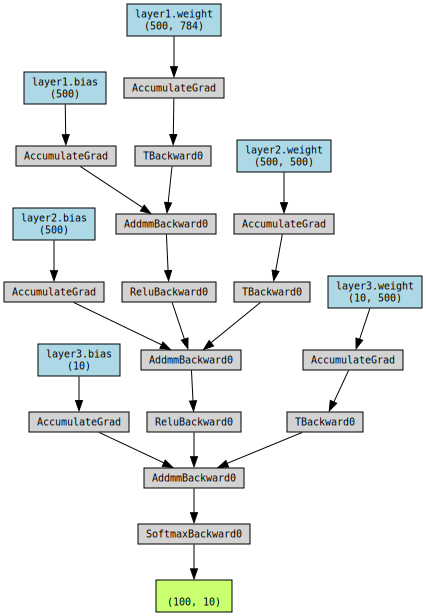

In [83]:
torchviz.make_dot(model(images), params=dict(model.named_parameters()))

In [86]:
"""
З огляду на надані результати, здається, що метод з використанням функції втрат Mean Squared Error (MSE) демонструє кращу ефективність з точки зору точності на тестовому наборі та зменшення втрат, що може вказувати на його відповідність для цієї конкретної задачі порівняно з CrossEntropyLoss.
"""

'\nЗ огляду на надані результати, здається, що метод з використанням функції втрат Mean Squared Error (MSE) демонструє кращу ефективність з точки зору точності на тестовому наборі та зменшення втрат, що може вказувати на його відповідність для цієї конкретної задачі порівняно з CrossEntropyLoss.\n'